# MACHINE LEARNING LAB ASSIGNMENT 2

## RIDHIMA TANEJA                                                                                21BCE2188

## QUESTION 1- On Dry Bean data from UCI repository

In [1]:
#import all the required libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize

In [2]:
# Fetch the dataset and extract features 
dry_bean = fetch_ucirepo(id=602)

X = dry_bean.data.features
y = dry_bean.data.targets.values.ravel()

### Task 1

Investigate how different feature scaling techniques such as Min-Max scaling, Standardization, Robust scaling affect the performance of classification algorithm on the dataset? Which scaling technique yields the best overall performance? Plot graph for this comparison. 

In [3]:
# Define scaling techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Dictionary to store results
scaler_results = {}


In [4]:
# Perform scaling and training with different scalers
for scaler_name, scaler in scalers.items():
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply scaling
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    
    # Evaluate the classifier using cross-validation
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Store results
    scaler_results[scaler_name] = {
        'cv_score': mean_cv_score,
        'model': knn,
        'scaler': scaler,
        'X_test_scaled': X_test_scaled,
        'y_test': y_test
    }


In [5]:
# Determine the best scaler based on cross-validation score
best_scaler_name = max(scaler_results, key=lambda key: scaler_results[key]['cv_score'])
best_scaler = scaler_results[best_scaler_name]['scaler']
best_model = scaler_results[best_scaler_name]['model']
X_test_scaled = scaler_results[best_scaler_name]['X_test_scaled']
y_test = scaler_results[best_scaler_name]['y_test']

print(f"The best scaling technique is: {best_scaler_name} with a cross-validation score of {scaler_results[best_scaler_name]['cv_score']:.4f}")

The best scaling technique is: RobustScaler with a cross-validation score of 0.9220


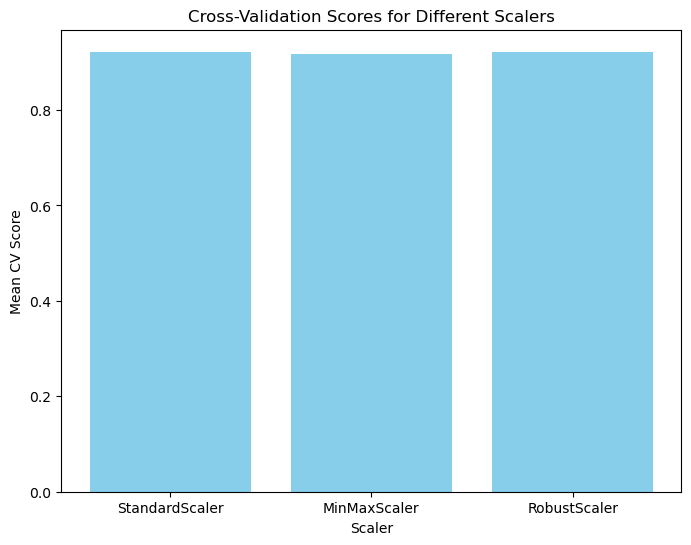

In [6]:
# Plotting cross-validation scores for different scalers
plt.figure(figsize=(8, 6))
plt.bar(scaler_results.keys(), [scaler_results[key]['cv_score'] for key in scaler_results], color='skyblue')
plt.title('Cross-Validation Scores for Different Scalers')
plt.xlabel('Scaler')
plt.ylabel('Mean CV Score')
plt.show()

### Task 2

Test the model with the given new instance and predict the target class. Display the name of 
the target class

In [7]:
new_instance = [[42020, 674.16, 208.81, 162.14, 1.29, 0.5174, 42530, 231.01, 0.7213, 0.9880, 0.4949, 0.9637, 0.9975, 0.9128,0.0,0.0]]
new_instance_scaled = best_scaler.transform(new_instance)
predicted_class = best_model.predict(new_instance_scaled)

print(f"The predicted class for the new instance is: {predicted_class[0]}")

The predicted class for the new instance is: DERMASON


C:\Users\tanej\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


### Task 3

Run Cross-Validation to get a reliable estimate of model performance. Plot the different 
values of k against the accuracy score.

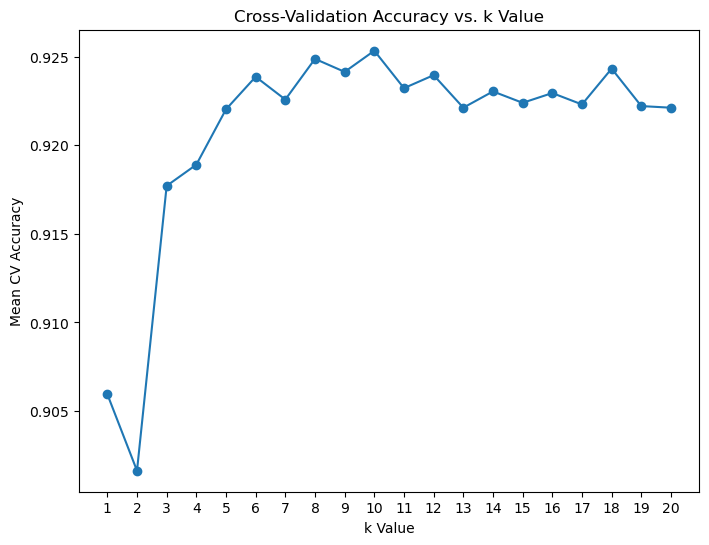

In [8]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Mean CV Accuracy')
plt.xticks(k_values)
plt.show()

### Task 4

Evaluate the metrics such as accuracy, precision, recall, F1-score, and ROC curve to evaluate model performance.

In [9]:
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.91      0.95      0.93       317
    DERMASON       0.89      0.91      0.90       671
       HOROZ       0.98      0.95      0.96       408
       SEKER       0.98      0.95      0.96       413
        SIRA       0.85      0.87      0.86       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



### Task 5

Plot the confusion matrix and ROC curves for all the multi-classes.

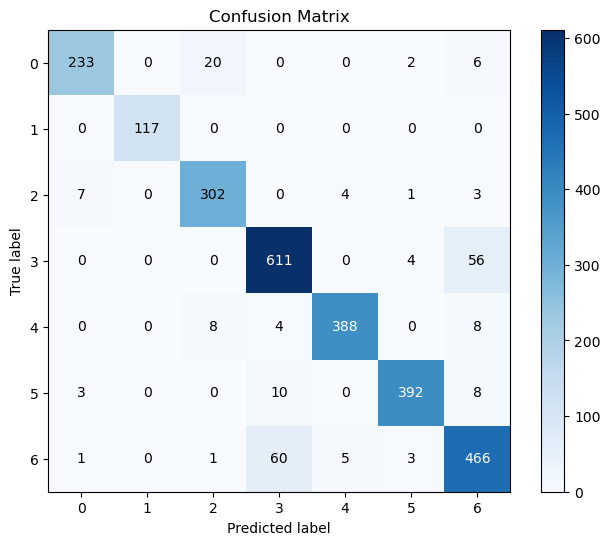

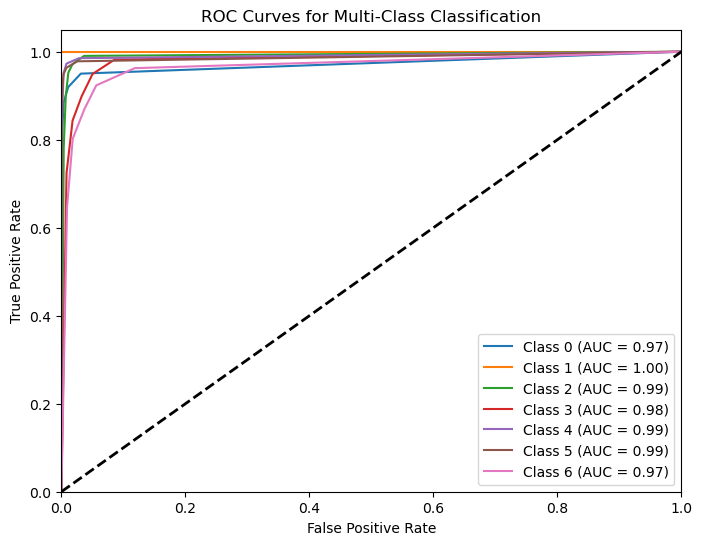

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve for multi-class
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_prob = best_model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

## Question 2- On Adult data from UCI repository

In [13]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

In [14]:
# Fetch the dataset
adult_data = fetch_ucirepo(id=2)

# Extract features and targets
X = adult_data.data.features
y = adult_data.data.targets

# Display the first few rows of data to understand it better
print(X.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

### Task 1

As the dataset contains missing values, decide how to handle missing values and apply the same before encoding.

In [15]:
# Check for missing values
print(X.isnull().sum())

# Handle missing values - replace missing values with the most frequent value (mode) for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Impute missing values in both numerical and categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64


### Task 2

Which encoding technique you will choose to convert the categorical features? Why? 
Apply the same and encode the data

Encoding categorical features using One-Hot Encoding
OneHotEncoding is chosen because it does not impose any ordinal relationship between categories.
This is ideal for the adult dataset where categories like "occupation" or "education" do not have a numerical order.

### Task 3

Apply the appropriate scaling to prevent features with larger ranges from dominating the 
model. C

In [16]:
# The StandardScaler is already included in the numerical transformer to prevent features with larger ranges from dominating the model.

# Create the pipeline with preprocessing and logistic regression
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=200))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

C:\Users\tanej\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Task 4

Evaluate the metrics such as accuracy, precision, recall, F1-score, and ROC curve to 
evaluate model performance.

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.60      0.92      0.72      4936
      <=50K.       0.58      0.07      0.13      2478
        >50K       0.49      0.59      0.53      1562
       >50K.       0.17      0.00      0.00       793

    accuracy                           0.58      9769
   macro avg       0.46      0.39      0.35      9769
weighted avg       0.54      0.58      0.48      9769



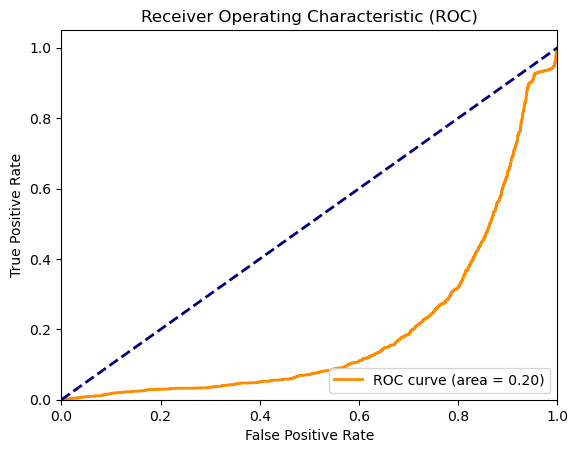

In [17]:
#Evaluate metrics - Accuracy, Precision, Recall, F1-score, and ROC curve
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_test_binary = (y_test == '>50K').astype(int)  # Converts to 1 for '>50K' and 0 otherwise

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Task 5

Plot the confusion matrix and ROC curves for all the multi-classes

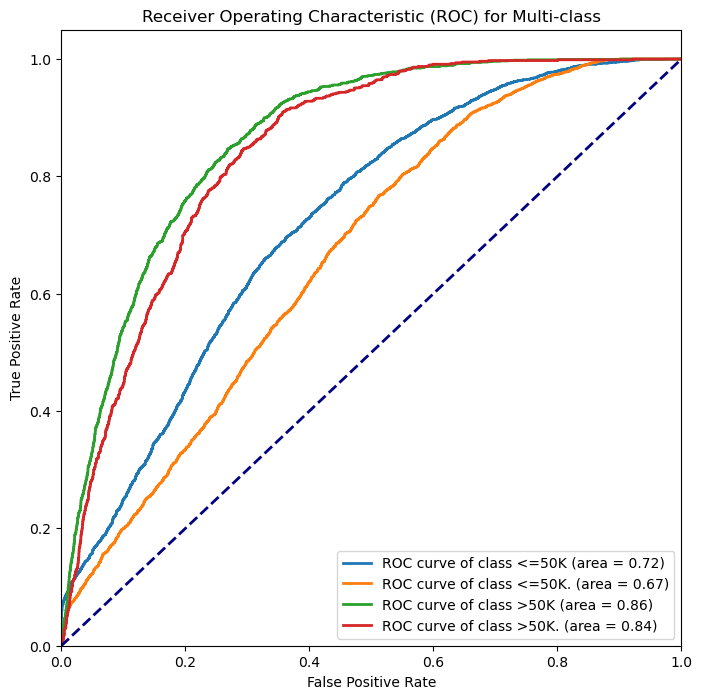

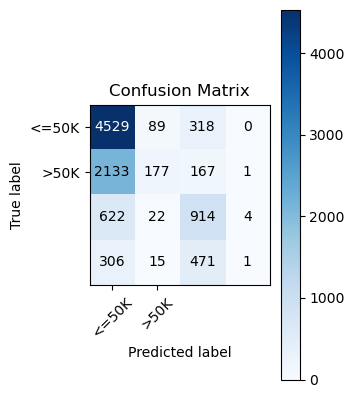

In [25]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize LabelBinarizer for multiclass labels
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Recalculate predictions to ensure correct matching of lengths
y_prob = clf.predict_proba(X_test)

# Number of classes
n_classes = y_test_binarized.shape[1]

# Initialize plot
plt.figure(figsize=(8, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {lb.classes_[i]} (area = {roc_auc:.2f})')

# Plot the ROC curve for the random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
plt.subplot(1, 2, 1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = ['<=50K', '>50K']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")


## Annexure

### ID3 on given data

#### Manual implementation of ID3 by calculating entropy and gain

In [26]:
import pandas as pd
import numpy as np

# Define the dataset
X = pd.DataFrame({
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play_Tennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
})

# Helper functions
def entropy(series):
    """Calculate the entropy of a pandas Series."""
    probs = series.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))

def information_gain(data, feature, target):
    """Calculate the information gain of a feature with respect to the target."""
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[feature] == value]
        prob = len(subset) / len(data)
        weighted_entropy += prob * entropy(subset[target])
    return total_entropy - weighted_entropy

def id3(data, features, target):
    """Recursive ID3 algorithm."""
    # Base cases
    if len(data[target].unique()) == 1:
        return data[target].values[0]
    if not features:
        return data[target].mode()[0]
    
    # Find the best feature to split on
    best_feature = max(features, key=lambda feature: information_gain(data, feature, target))
    tree = {best_feature: {}}
    
    # Recursively build the tree
    remaining_features = [f for f in features if f != best_feature]
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        subtree = id3(subset, remaining_features, target)
        tree[best_feature][value] = subtree
    
    return tree

# Define features and target
features = X.columns[:-1]
target = "Play_Tennis"

# Build the decision tree
decision_tree = id3(X, list(features), target)

print("Decision Tree:")
print(decision_tree)


Decision Tree:
{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rainy': {'Windy': {'Weak': 'Yes', 'Strong': 'No'}}}}


#### To visualise tree using sklearn tree plot, use inbuilt Decision Tree Classisfier

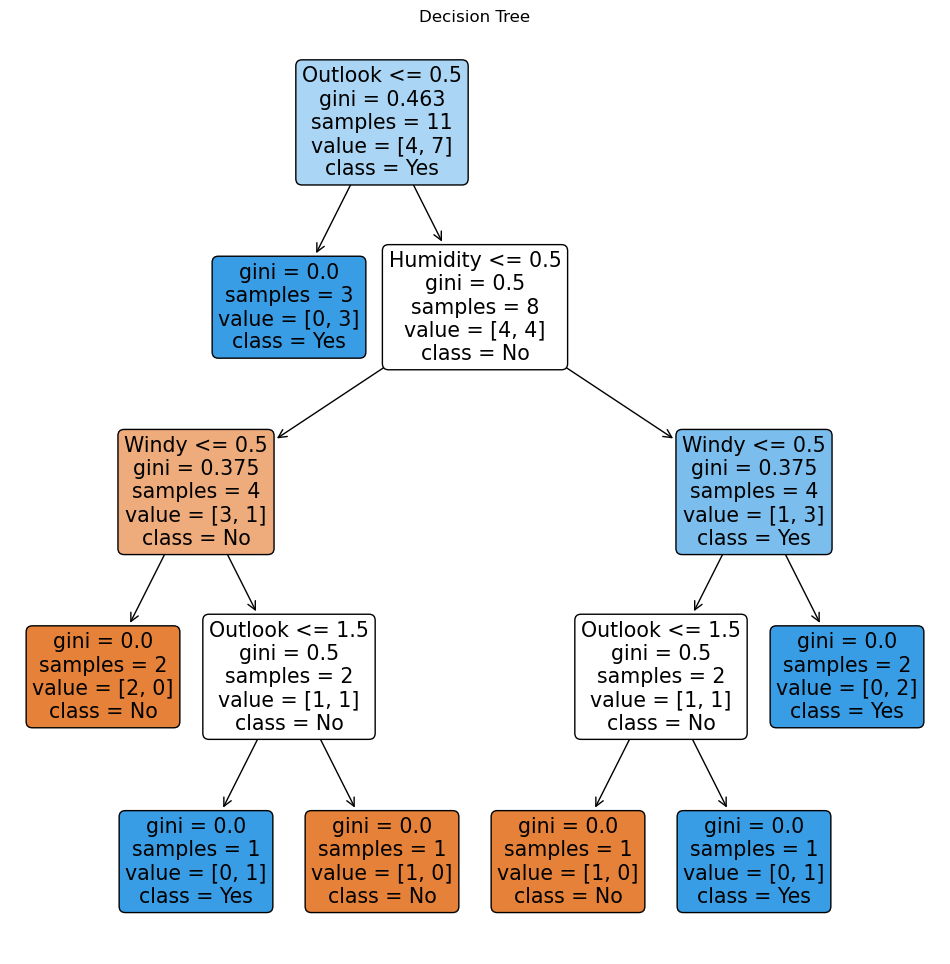

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define the dataset
X = pd.DataFrame({
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play_Tennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])

# Encode categorical features
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Define features and target
features = X.columns[:-1]  # Exclude target column
target = X['Play_Tennis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], target, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 12))
plot_tree(clf, feature_names=features, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()
